In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Muestreo con reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=True)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

[12  5  0  3 11  3  7  9  3  5  2  4  7  6  8] ,Num Samples: 15,numberUnique: 11
[ 8 12 10  1  6  7  7 14  8  1  5  9 13  8  9] ,Num Samples: 15,numberUnique: 10
[ 4  3  0  3  5 14  0  2  3  8  1  3 13  3  3] ,Num Samples: 15,numberUnique: 9
[14  7  0  1  9  9  0 10  4  7  3 14 11  2  7] ,Num Samples: 15,numberUnique: 10
[12  2  0  0  4  5  5  6  8  4  1  4  9 10 10] ,Num Samples: 15,numberUnique: 10
[ 8  1  1  7  9  9  3  6  7 11 14  2 11  0 14] ,Num Samples: 15,numberUnique: 10
[ 3  5 12  9 10  4 11  4  6  4  4  3 12  4  4] ,Num Samples: 15,numberUnique: 8
[ 8 14  4  3 10  7 13  5  5  0  1  5  9  3  0] ,Num Samples: 15,numberUnique: 11
[ 5 14  0  1  2  4  2  0 13  3  2 10 13  0  7] ,Num Samples: 15,numberUnique: 10
[ 5  9  0 10  2 11 10  7 11  2  9  2 14  3 14] ,Num Samples: 15,numberUnique: 9
[11  3  2 14  3  4  1  2 11 14  9 10  1  4 10] ,Num Samples: 15,numberUnique: 8
[ 6 11  8 11  2  3  0  0  6  0  6  3 14 10  3] ,Num Samples: 15,numberUnique: 8
[ 8 12  8 13 14  8 13  2  3 14  2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4


In [ ]:
# Muestreo sin reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=False)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

[ 1  6  8  9 14  4  2 13 10  7 11  3  0  5 12] ,Num Samples: 15,numberUnique: 15
[ 2  4  3 13 11  0 10  9  5 14  8 12  7  6  1] ,Num Samples: 15,numberUnique: 15
[ 4 12  7  9 13  6 10 14 11  1  8  3  2  0  5] ,Num Samples: 15,numberUnique: 15
[13  6  1  8  5 14  9 12 11  2  3  7  4 10  0] ,Num Samples: 15,numberUnique: 15
[ 0 10  2  3  5 14  7 11 13  9 12  1  4  8  6] ,Num Samples: 15,numberUnique: 15
[ 1 13 12  7  9  6  8 10  4  5  3  0 14  2 11] ,Num Samples: 15,numberUnique: 15
[ 2 12  6 11  9  1  0 13  5  7 10  3 14  8  4] ,Num Samples: 15,numberUnique: 15
[10  6  8 12  7  9  3 14 13 11  4  2  1  0  5] ,Num Samples: 15,numberUnique: 15
[13 12  6  4 14  3  8  1 11  7  2 10  0  9  5] ,Num Samples: 15,numberUnique: 15
[ 8 10  7  5  0 14  6 11 13 12  9  2  1  4  3] ,Num Samples: 15,numberUnique: 15
[10  8  2  1  5  7  4 11  9  3 12 13  6 14  0] ,Num Samples: 15,numberUnique: 15
[ 4  1  9  6  5 13 12  7  3 10  8  0 11  2 14] ,Num Samples: 15,numberUnique: 15
[ 2 11 10  9  1  5  7 14  8 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0


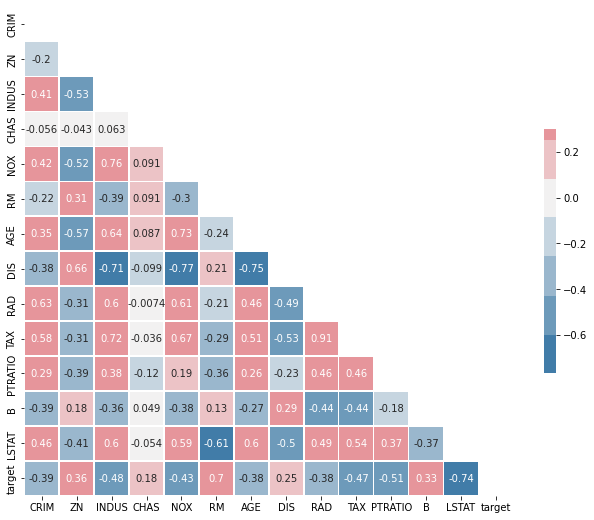

In [ ]:
correlation= df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Sólo se puede hacer en variables númericas. Correlación positiva entre v1 y v2, implica que si uno aumenta el otro también lo hará. Correlación negativa entre v1 y v2, implica que si uno aumenta el otro no lo hará.

La matriz es útil para revisar correlaciones y poder hacer análisis más certeros.

# Actividad 1
Cargar el DF, limpiar, muestrear el 10% de la data con remplazos, generar al menos 2 visualizaciones, una de ellas debe ser la matriz de correlación


* Muestrear el 10% de la data, con reemplazo
* A ese 10% hacer visualizaciones (matriz de corr)

In [ ]:
filename = "/content/EEG.machinelearing_data_BRMH.csv"
df = pd.read_csv(filename)
df_copy= df
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


Al ser demasiadas columnas, dificulta su análisis.

In [ ]:
df.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [ ]:
df.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

In [ ]:
df = df.loc[:,["no.", "sex", "age", "eeg.date", "education", "IQ", "main.disorder", "specific.disorder", "AB.A.delta.a.FP1", "AB.A.delta.b.FP2"]]

Se eliminaron columnas extra, ya que contienen datos númericos muy específicos que no serán utilizados para esta actividad.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   no.                945 non-null    int64  
 1   sex                945 non-null    object 
 2   age                945 non-null    float64
 3   eeg.date           945 non-null    object 
 4   education          930 non-null    float64
 5   IQ                 932 non-null    float64
 6   main.disorder      945 non-null    object 
 7   specific.disorder  945 non-null    object 
 8   AB.A.delta.a.FP1   945 non-null    float64
 9   AB.A.delta.b.FP2   945 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 74.0+ KB


In [ ]:
df["eeg.date"] = pd.to_datetime(df["eeg.date"])

Se convierte la columna con las fechas de los examenes a datetime.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   no.                945 non-null    int64         
 1   sex                945 non-null    object        
 2   age                945 non-null    float64       
 3   eeg.date           945 non-null    datetime64[ns]
 4   education          930 non-null    float64       
 5   IQ                 932 non-null    float64       
 6   main.disorder      945 non-null    object        
 7   specific.disorder  945 non-null    object        
 8   AB.A.delta.a.FP1   945 non-null    float64       
 9   AB.A.delta.b.FP2   945 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 74.0+ KB


Se detectan valores nulos para "education" e "IQ".

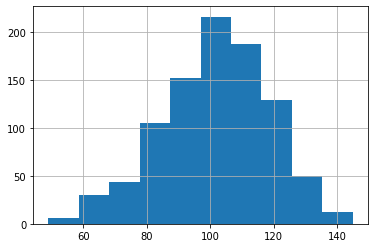

In [ ]:
df["IQ"].hist()

In [ ]:
df["IQ"] = df["IQ"].replace([np.nan], 101.58)

Se reemplazan los valores de nulos de IQ por la media de la columna, ya que como podemos ver en el histograma, gran cantidad de los datos se concentran cerca de ese valor. De este modo no alteraremos de gran manera la data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   no.                945 non-null    int64         
 1   sex                945 non-null    object        
 2   age                945 non-null    float64       
 3   eeg.date           945 non-null    datetime64[ns]
 4   education          930 non-null    float64       
 5   IQ                 945 non-null    float64       
 6   main.disorder      945 non-null    object        
 7   specific.disorder  945 non-null    object        
 8   AB.A.delta.a.FP1   945 non-null    float64       
 9   AB.A.delta.b.FP2   945 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 74.0+ KB


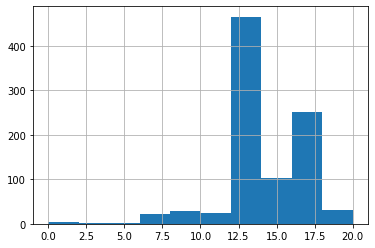

In [ ]:
df["education"].hist()

In [ ]:
df["education"] = df["education"].replace([np.nan], 13.43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   no.                945 non-null    int64         
 1   sex                945 non-null    object        
 2   age                945 non-null    float64       
 3   eeg.date           945 non-null    datetime64[ns]
 4   education          945 non-null    float64       
 5   IQ                 945 non-null    float64       
 6   main.disorder      945 non-null    object        
 7   specific.disorder  945 non-null    object        
 8   AB.A.delta.a.FP1   945 non-null    float64       
 9   AB.A.delta.b.FP2   945 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 74.0+ KB


Se reemplazan los valores de nulos de "education" por la media de la columna. De este modo, y al igual que en la columna "IQ" consideramos a estas personas de la muestra "valores promedio" para no alterar de gran manera el dataset.

In [ ]:
945*0.1

94.5

In [ ]:
samples = np.random.choice(a=95, size=95, replace=True)
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2
48,49,F,26.15,2017-04-03,16.00,103.0,Trauma and stress related disorder,Acute stress disorder,13.236088,13.842671
2,3,M,32.00,2012-09-10,16.00,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684
75,76,M,25.00,2017-05-24,12.00,99.0,Addictive disorder,Alcohol use disorder,14.838166,16.509008
6,7,F,26.00,2012-12-03,16.00,103.0,Addictive disorder,Alcohol use disorder,21.780747,26.655328
87,88,F,34.00,2017-06-20,12.00,83.0,Addictive disorder,Alcohol use disorder,7.498297,11.361613
...,...,...,...,...,...,...,...,...,...,...
88,89,F,25.00,2017-07-12,14.00,105.0,Addictive disorder,Alcohol use disorder,14.614688,14.341742
17,18,M,30.00,2013-09-27,13.43,86.0,Addictive disorder,Alcohol use disorder,12.443237,12.503703
34,35,F,25.61,2013-10-12,16.00,108.0,Trauma and stress related disorder,Acute stress disorder,12.187185,22.798506
63,64,M,29.00,2016-06-02,14.00,105.0,Addictive disorder,Alcohol use disorder,13.886665,13.433123


In [ ]:
bootstrappedDF

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2
48,49,F,26.15,2017-04-03,16.00,103.0,Trauma and stress related disorder,Acute stress disorder,13.236088,13.842671
2,3,M,32.00,2012-09-10,16.00,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684
75,76,M,25.00,2017-05-24,12.00,99.0,Addictive disorder,Alcohol use disorder,14.838166,16.509008
6,7,F,26.00,2012-12-03,16.00,103.0,Addictive disorder,Alcohol use disorder,21.780747,26.655328
87,88,F,34.00,2017-06-20,12.00,83.0,Addictive disorder,Alcohol use disorder,7.498297,11.361613
...,...,...,...,...,...,...,...,...,...,...
88,89,F,25.00,2017-07-12,14.00,105.0,Addictive disorder,Alcohol use disorder,14.614688,14.341742
17,18,M,30.00,2013-09-27,13.43,86.0,Addictive disorder,Alcohol use disorder,12.443237,12.503703
34,35,F,25.61,2013-10-12,16.00,108.0,Trauma and stress related disorder,Acute stress disorder,12.187185,22.798506
63,64,M,29.00,2016-06-02,14.00,105.0,Addictive disorder,Alcohol use disorder,13.886665,13.433123


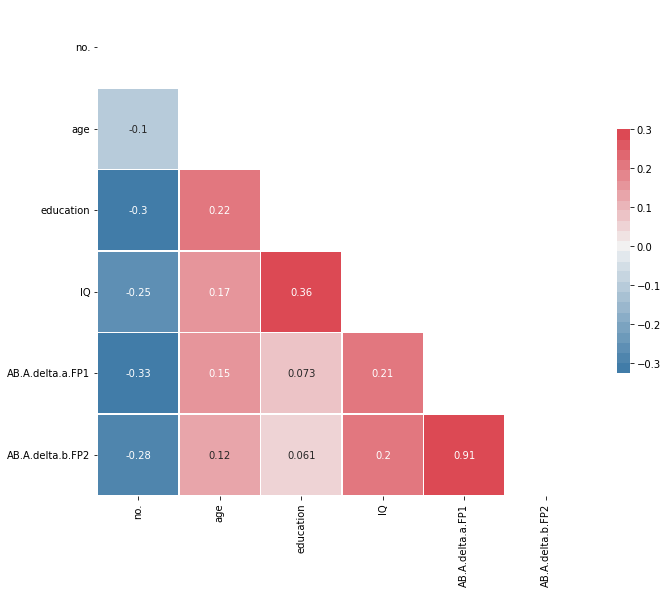

In [ ]:
correlation= bootstrappedDF.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=25)
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se pueden observar las correlaciones entre las distintas variables, siendo una de las más destacables la de IQ con los años de educación. También se ve una cierta correlación entre "age" y "education".

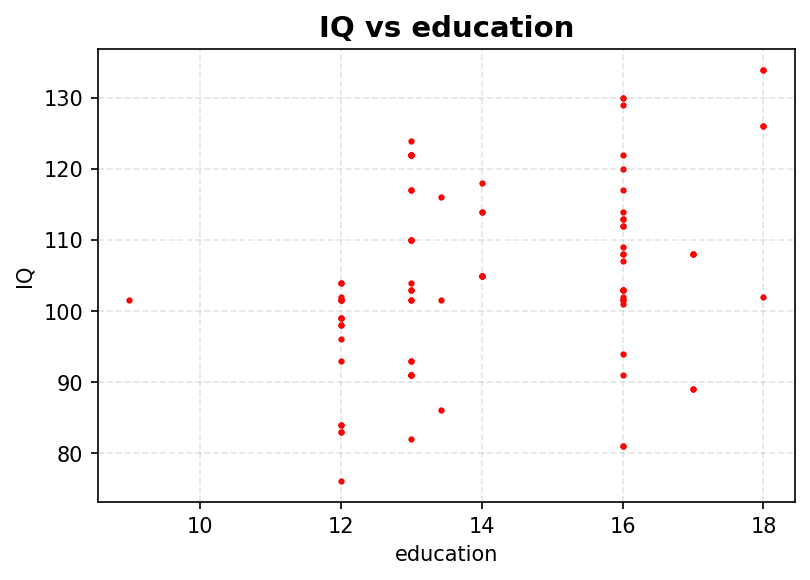

In [ ]:
plt.figure(dpi=150)

plt.scatter(bootstrappedDF["education"],bootstrappedDF["IQ"], s=4, c="red")
plt.ylabel("IQ")
plt.xlabel("education")
plt.title("IQ vs education", fontweight="bold", fontsize=14)
plt.grid(c = 'gray', alpha = .2, linestyle = '--')

plt.show()

Podemos ver la relación entre los años de educación e IQ, y se observa que a medida que aumentan los años de educación se pueden dar valores más altos para IQ.

# Actividad 2
Cargar el DF, limpiar, muestrear el 25% de la data sin remplazos, generar al menos 3 visualizaciones, una de ellas debe ser la matriz de correlación


* Muestrear el 25% de la data, sin reemplazo
* A ese 25% hacer 3 visualizaciones (matriz de corr)

In [ ]:
filename = "/content/hotel_bookings.csv"
df = pd.read_csv(filename)
df_copy= df
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_

Debido a la gran cantidad de valores nulos en la columna "company" se decide borrarla, ya que no tiene sentido trabajar con ella. Además se borrarán otras columnas del dataset, que contienen datos no númericos o bien son información innecesaria en este momento para la actividad.

In [ ]:
df = df.drop(columns=["meal", "company", "lead_time", "stays_in_weekend_nights", "country", "market_segment", "distribution_channel", "is_repeated_guest", "reserved_room_type", "assigned_room_type", "booking_changes", "agent", "customer_type", "adr", "reservation_status", "required_car_parking_spaces", "total_of_special_requests", "reservation_status_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119390 non-null  int64  
 10  previous_cancellations          119390 non-null  int64  
 11  previous_bookings_not_canceled  119390 non-null  int64  
 12  days_in_waiting_

In [ ]:
df["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
df.describe()

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,2016.156554,27.165173,15.798241,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,2.321149
std,0.482918,0.707476,13.605138,8.780829,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,17.594721
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2016.000000,16.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2016.000000,28.000000,16.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2017.000000,38.000000,23.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2017.000000,53.000000,31.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,391.000000


In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
days_in_waiting_list              0
dtype: int64

In [ ]:
df["children"] = df["children"].replace([np.nan], 0)

Para el caso de la columna "children", se dejan los valores nulos como 0.

In [ ]:
df["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df = df.reset_index()
df.head()

,index,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list
0,0,Resort Hotel,0,2015,July,27,1,0,2,0.0,0,0,0,0
1,1,Resort Hotel,0,2015,July,27,1,0,2,0.0,0,0,0,0
2,2,Resort Hotel,0,2015,July,27,1,1,1,0.0,0,0,0,0
3,3,Resort Hotel,0,2015,July,27,1,1,1,0.0,0,0,0,0
4,4,Resort Hotel,0,2015,July,27,1,2,2,0.0,0,0,0,0


In [ ]:
119390*0.25

29847.5

In [ ]:
samples = np.random.choice(a=29847, size=29847, replace=False)
bootstrappedDF2 = df.loc[samples, :]
bootstrappedDF2

,index,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list
11124,11124,Resort Hotel,1,2017,April,16,21,7,2,0.0,0,0,0,0
11883,11883,Resort Hotel,1,2017,June,22,2,5,2,0.0,0,0,0,0
21039,21039,Resort Hotel,0,2016,February,8,14,0,2,0.0,0,0,0,0
28057,28057,Resort Hotel,0,2016,September,39,18,0,2,0.0,0,0,0,0
534,534,Resort Hotel,0,2015,July,29,18,6,2,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,2080,Resort Hotel,1,2015,September,40,30,5,2,0.0,0,0,0,0
26256,26256,Resort Hotel,0,2016,July,30,19,5,2,0.0,0,0,0,0
6192,6192,Resort Hotel,0,2016,May,22,28,1,2,0.0,0,0,0,0
2413,2413,Resort Hotel,0,2015,October,42,12,1,1,0.0,0,0,0,0


In [ ]:
bootstrappedDF2["arrival_date_month"].value_counts()

August       3840
October      3544
July         3535
September    3108
April        2495
May          2419
March        2279
June         2065
February     2021
December     1715
November     1602
January      1224
Name: arrival_date_month, dtype: int64

In [ ]:
bootstrappedDF2["month_lt"]=0

for i in bootstrappedDF2.index:
  if bootstrappedDF2["arrival_date_month"][i]=="January":
    bootstrappedDF2["month_lt"][i]=1
  elif bootstrappedDF2["arrival_date_month"][i]=="February":
    bootstrappedDF2["month_lt"][i]=2
  elif bootstrappedDF2["arrival_date_month"][i]=="March":
    bootstrappedDF2["month_lt"][i]=3
  elif bootstrappedDF2["arrival_date_month"][i]=="April":
    bootstrappedDF2["month_lt"][i]=4  
  elif bootstrappedDF2["arrival_date_month"][i]=="May":
    bootstrappedDF2["month_lt"][i]=5
  elif bootstrappedDF2["arrival_date_month"][i]=="June":
    bootstrappedDF2["month_lt"][i]=6
  elif bootstrappedDF2["arrival_date_month"][i]=="July":
    bootstrappedDF2["month_lt"][i]=7
  elif bootstrappedDF2["arrival_date_month"][i]=="August":
    bootstrappedDF2["month_lt"][i]=8
  elif bootstrappedDF2["arrival_date_month"][i]=="September":
    bootstrappedDF2["month_lt"][i]=9
  elif bootstrappedDF2["arrival_date_month"][i]=="October":
    bootstrappedDF2["month_lt"][i]=10
  elif bootstrappedDF2["arrival_date_month"][i]=="November":
    bootstrappedDF2["month_lt"][i]=11
  elif bootstrappedDF2["arrival_date_month"][i]=="December":
    bootstrappedDF2["month_lt"][i]=12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/

In [ ]:
bootstrappedDF2["month_lt"].value_counts()

8     3840
10    3544
7     3535
9     3108
4     2495
5     2419
3     2279
6     2065
2     2021
12    1715
11    1602
1     1224
Name: month_lt, dtype: int64

In [ ]:
bootstrappedDF2["arrival_date_week_number"].value_counts()

33    947
43    917
31    861
34    858
41    857
30    854
29    831
32    824
35    778
38    774
36    756
18    754
39    748
44    725
42    724
28    701
40    675
37    633
15    631
21    625
27    603
45    593
7     585
13    575
17    571
22    555
20    543
23    531
9     528
14    501
16    498
26    497
49    494
19    494
25    489
10    471
12    459
11    455
6     450
24    449
47    430
8     427
53    404
52    390
48    329
46    288
4     285
3     281
2     271
5     270
50    253
51    251
1     154
Name: arrival_date_week_number, dtype: int64

Se crea una nueva variable, "month_lt", para almacenar el dato de la columna "arrival_date_month" como número.

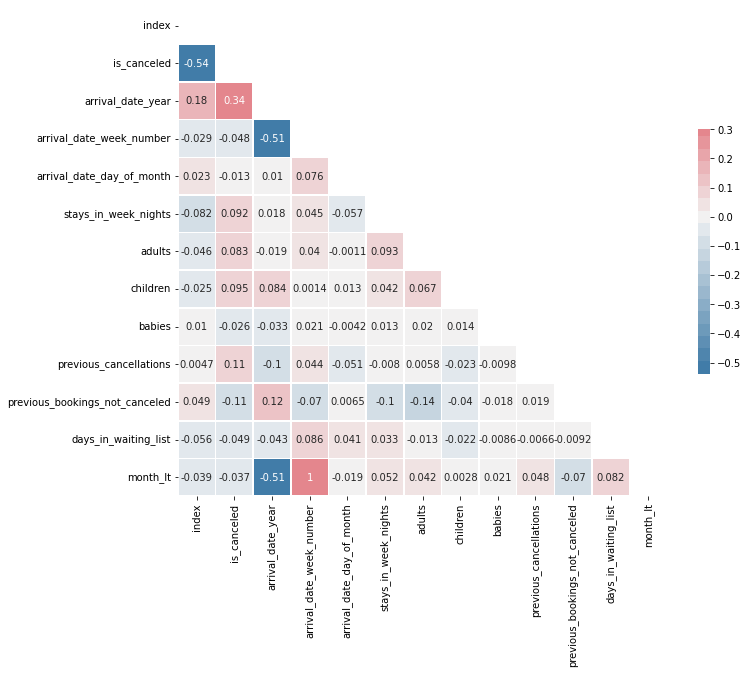

In [ ]:
correlation= bootstrappedDF2.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=25)
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

En general se observan bajas correlaciones entre las variables, no se dan correlaciones positivas ni negativas.

In [ ]:
g2 = bootstrappedDF2.groupby(["arrival_date_year"])[["is_canceled"]].sum()
g2

,is_canceled
arrival_date_year,
2015,2138
2016,4930
2017,4046


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


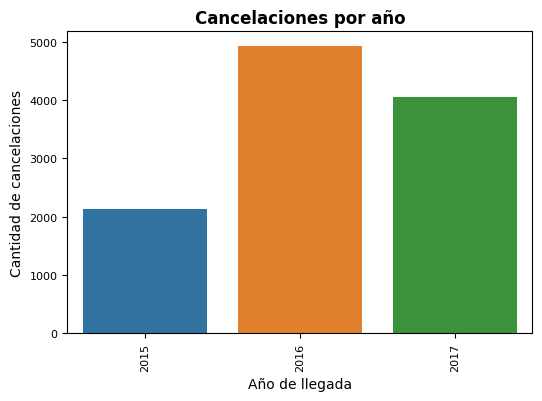

In [ ]:
plt.figure(dpi=100)
sns.barplot(g2.index, g2["is_canceled"])

plt.title("Cancelaciones por año", fontsize = 12, fontweight="bold")
plt.tick_params(axis="x", labelsize=8, rotation=90)
plt.tick_params(axis="y", labelsize=8)
plt.ylabel("Cantidad de cancelaciones", fontsize = 10)
plt.xlabel("Año de llegada", fontsize = 10)

plt.show()

Se puede ver que con los años ha ido aumentando la cantidad de cancelaciones, siendo el 2016 el año que más tiene.

In [ ]:
g3 = bootstrappedDF2.groupby(["arrival_date_month"])[["is_canceled"]].sum()
g3

,is_canceled
arrival_date_month,
April,1059
August,1636
December,631
February,791
January,325
July,1436
June,1007
March,761
May,1023


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


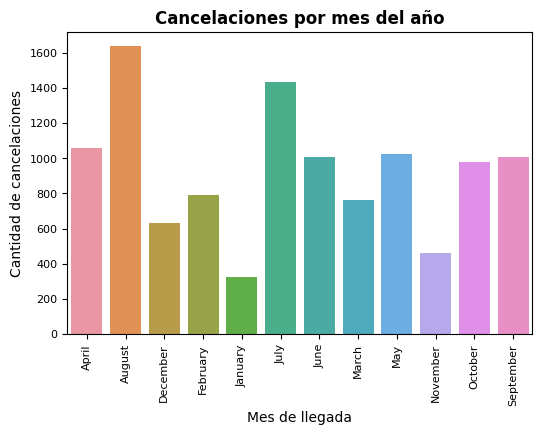

In [ ]:
plt.figure(dpi=100)
sns.barplot(g3.index, g3["is_canceled"])

plt.title("Cancelaciones por mes del año", fontsize=12, fontweight="bold")
plt.tick_params(axis="x", labelsize=8, rotation=90)
plt.tick_params(axis="y", labelsize=8)
plt.ylabel("Cantidad de cancelaciones", fontsize = 10)
plt.xlabel("Mes de llegada", fontsize = 10)

plt.show()

Se observa que en época de verano se dan más cancelaciones que en invierno.